# Ultimate Ski Holiday 2026 - Data Analysis
## Inter-Uni Datathon 2025 - Allianz Challenge

**Objective**: Identify the optimal week and ski resort for the ultimate ski holiday in 2026

**Key Considerations**:
- Visitor numbers and crowd levels
- Weather patterns and snow conditions
- Prices and value for money
- Unique features and accessibility of each resort

## 1. Setup and Data Loading

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the datasets
file_path = "2025 Allianz Datathon Dataset.xlsx"

# Load all sheets
visitation_data = pd.read_excel(file_path, sheet_name="Visitation Data")
climate_data = pd.read_excel(file_path, sheet_name="Climate Data")

print("Dataset loaded successfully!")
print(f"Visitation data shape: {visitation_data.shape}")
print(f"Climate data shape: {climate_data.shape}")

Dataset loaded successfully!
Visitation data shape: (165, 11)
Climate data shape: (39813, 7)


## 2. Initial Data Exploration

In [3]:
# Display basic information about visitation data
print("VISITATION DATA OVERVIEW:")
print("=" * 40)
print(visitation_data.head())
print("\nData Info:")
print(visitation_data.info())
print("\nSummary Statistics:")
print(visitation_data.describe())

VISITATION DATA OVERVIEW:
   Year  Week  Mt. Baw Baw  Mt. Stirling  Mt. Hotham  Falls Creek  Mt. Buller  \
0  2014     1          555            60        3483         2790        8296   
1  2014     2          804            42        1253         1425        1987   
2  2014     3          993            30        2992         2101        2413   
3  2014     4         2976           165        9680         9544       18831   
4  2014     5        11112           645       29628        26211       49217   

   Selwyn  Thredbo  Perisher  Charlotte Pass  
0    1041     5535      7370             408  
1     383     2090      2751             151  
2     597     3216      4255             230  
3    2877    15497     20265            1134  
4    8588    46546     61339            3403  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0

In [4]:
# Display basic information about climate data
print("CLIMATE DATA OVERVIEW:")
print("=" * 40)
print(climate_data.head())
print("\nData Info:")
print(climate_data.info())
print("\nSummary Statistics:")
print(climate_data.describe())

CLIMATE DATA OVERVIEW:
   Bureau of Meteorology station number  Year  Month  Day  \
0                                 71075  2010      1    1   
1                                 71075  2010      1    2   
2                                 71075  2010      1    3   
3                                 71075  2010      1    4   
4                                 71075  2010      1    5   

   Maximum temperature (Degree C)  Minimum temperature (Degree C)  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   

   Rainfall amount (millimetres)  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                   

In [5]:
# Check for missing values
print("MISSING VALUES ANALYSIS:")
print("=" * 40)
print("\nVisitation Data Missing Values:")
print(visitation_data.isnull().sum())
print("\nClimate Data Missing Values:")
print(climate_data.isnull().sum())

MISSING VALUES ANALYSIS:

Visitation Data Missing Values:
Year              0
Week              0
Mt. Baw Baw       0
Mt. Stirling      0
Mt. Hotham        0
Falls Creek       0
Mt. Buller        0
Selwyn            0
Thredbo           0
Perisher          0
Charlotte Pass    0
dtype: int64

Climate Data Missing Values:
Bureau of Meteorology station number       0
Year                                       0
Month                                      0
Day                                        0
Maximum temperature (Degree C)          1538
Minimum temperature (Degree C)          1533
Rainfall amount (millimetres)           1956
dtype: int64


## 3. Data Cleaning and Preparation

In [6]:
# Get resort names from visitation data (excluding Year and Week columns)
resort_columns = [col for col in visitation_data.columns if col not in ['Year', 'Week']]
print("Available resorts:")
for i, resort in enumerate(resort_columns, 1):
    print(f"{i}. {resort}")

print(f"\nTotal resorts: {len(resort_columns)}")

Available resorts:
1. Mt. Baw Baw
2. Mt. Stirling
3. Mt. Hotham
4. Falls Creek
5. Mt. Buller
6. Selwyn
7. Thredbo
8. Perisher
9. Charlotte Pass

Total resorts: 9


In [7]:
# Create a mapping of weather stations to resorts based on README information
weather_station_mapping = {
    71032: 'Thredbo',  # Thredbo AWS
    71075: 'Perisher',  # Perisher AWS - also covers Charlotte Pass
    72161: 'Charlotte Pass',  # Cabramurra SMHEA AWS - close to Charlotte Pass
    83024: 'Mt. Buller',  # Mount Buller - also covers Mt. Stirling
    83084: 'Falls Creek',  # Falls Creek
    83085: 'Mt. Hotham',  # Mount Hotham
    85291: 'Mt. Baw Baw'   # Mount Baw Baw
}

# Add resort names to climate data
climate_data['Resort'] = climate_data['Bureau of Meteorology station number'].map(weather_station_mapping)

print("Weather station to resort mapping:")
for station, resort in weather_station_mapping.items():
    count = climate_data[climate_data['Bureau of Meteorology station number'] == station].shape[0]
    print(f"Station {station} -> {resort}: {count} records")

Weather station to resort mapping:
Station 71032 -> Thredbo: 5685 records
Station 71075 -> Perisher: 5688 records
Station 72161 -> Charlotte Pass: 5688 records
Station 83024 -> Mt. Buller: 5688 records
Station 83084 -> Falls Creek: 5688 records
Station 83085 -> Mt. Hotham: 5688 records
Station 85291 -> Mt. Baw Baw: 5688 records


In [8]:
# Create date column for climate data
climate_data['Date'] = pd.to_datetime(climate_data[['Year', 'Month', 'Day']])

print("Climate data date range:")
print(f"From: {climate_data['Date'].min()}")
print(f"To: {climate_data['Date'].max()}")
print(f"Total days: {climate_data['Date'].nunique()}")

Climate data date range:
From: 2010-01-01 00:00:00
To: 2025-07-28 00:00:00
Total days: 5688


## 4. Ski Season Week Mapping

In [9]:
# Define ski season dates for each year (based on 2024 example from README)
# Week 1 starts around early June, Week 15 ends in mid September

def get_ski_season_dates(year):
    """Generate ski season dates for a given year"""
    # Approximate ski season: early June to mid September (15 weeks)
    # This is based on the 2024 dates provided in README
    import datetime
    
    # Start around first week of June
    start_date = datetime.date(year, 6, 8)  # Approximate start
    
    week_dates = {}
    for week in range(1, 16):
        week_start = start_date + datetime.timedelta(weeks=week-1)
        week_end = week_start + datetime.timedelta(days=6)
        week_dates[week] = {'start': week_start, 'end': week_end}
    
    return week_dates

# Generate ski season dates for all years in our data
years_in_data = sorted(visitation_data['Year'].unique())
ski_seasons = {}

for year in years_in_data:
    ski_seasons[year] = get_ski_season_dates(year)

print("Ski season mapping created for years:", years_in_data)
print("\nExample - 2024 Week 1:", ski_seasons[2024][1])
print("Example - 2024 Week 15:", ski_seasons[2024][15])

Ski season mapping created for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Example - 2024 Week 1: {'start': datetime.date(2024, 6, 8), 'end': datetime.date(2024, 6, 14)}
Example - 2024 Week 15: {'start': datetime.date(2024, 9, 14), 'end': datetime.date(2024, 9, 20)}


## Simple visualisation

LOADING VISITATION DATA...
Visitation data loaded: 165 records
Data filtered for 2022-2024
Found 9 resorts with data:
Resorts: Mt. Baw Baw, Mt. Stirling, Mt. Hotham, Falls Creek, Mt. Buller, Selwyn, Thredbo, Perisher, Charlotte Pass
Note: Mt. Stirling, Falls Creek excluded ONLY from average peak week calculations

GENERATING COMPREHENSIVE VISUALIZATION REPORT...
Note: Mt. Stirling, Falls Creek excluded ONLY from average peak week calculations

CREATING PEAK WEEK ANALYSIS...
------------------------------


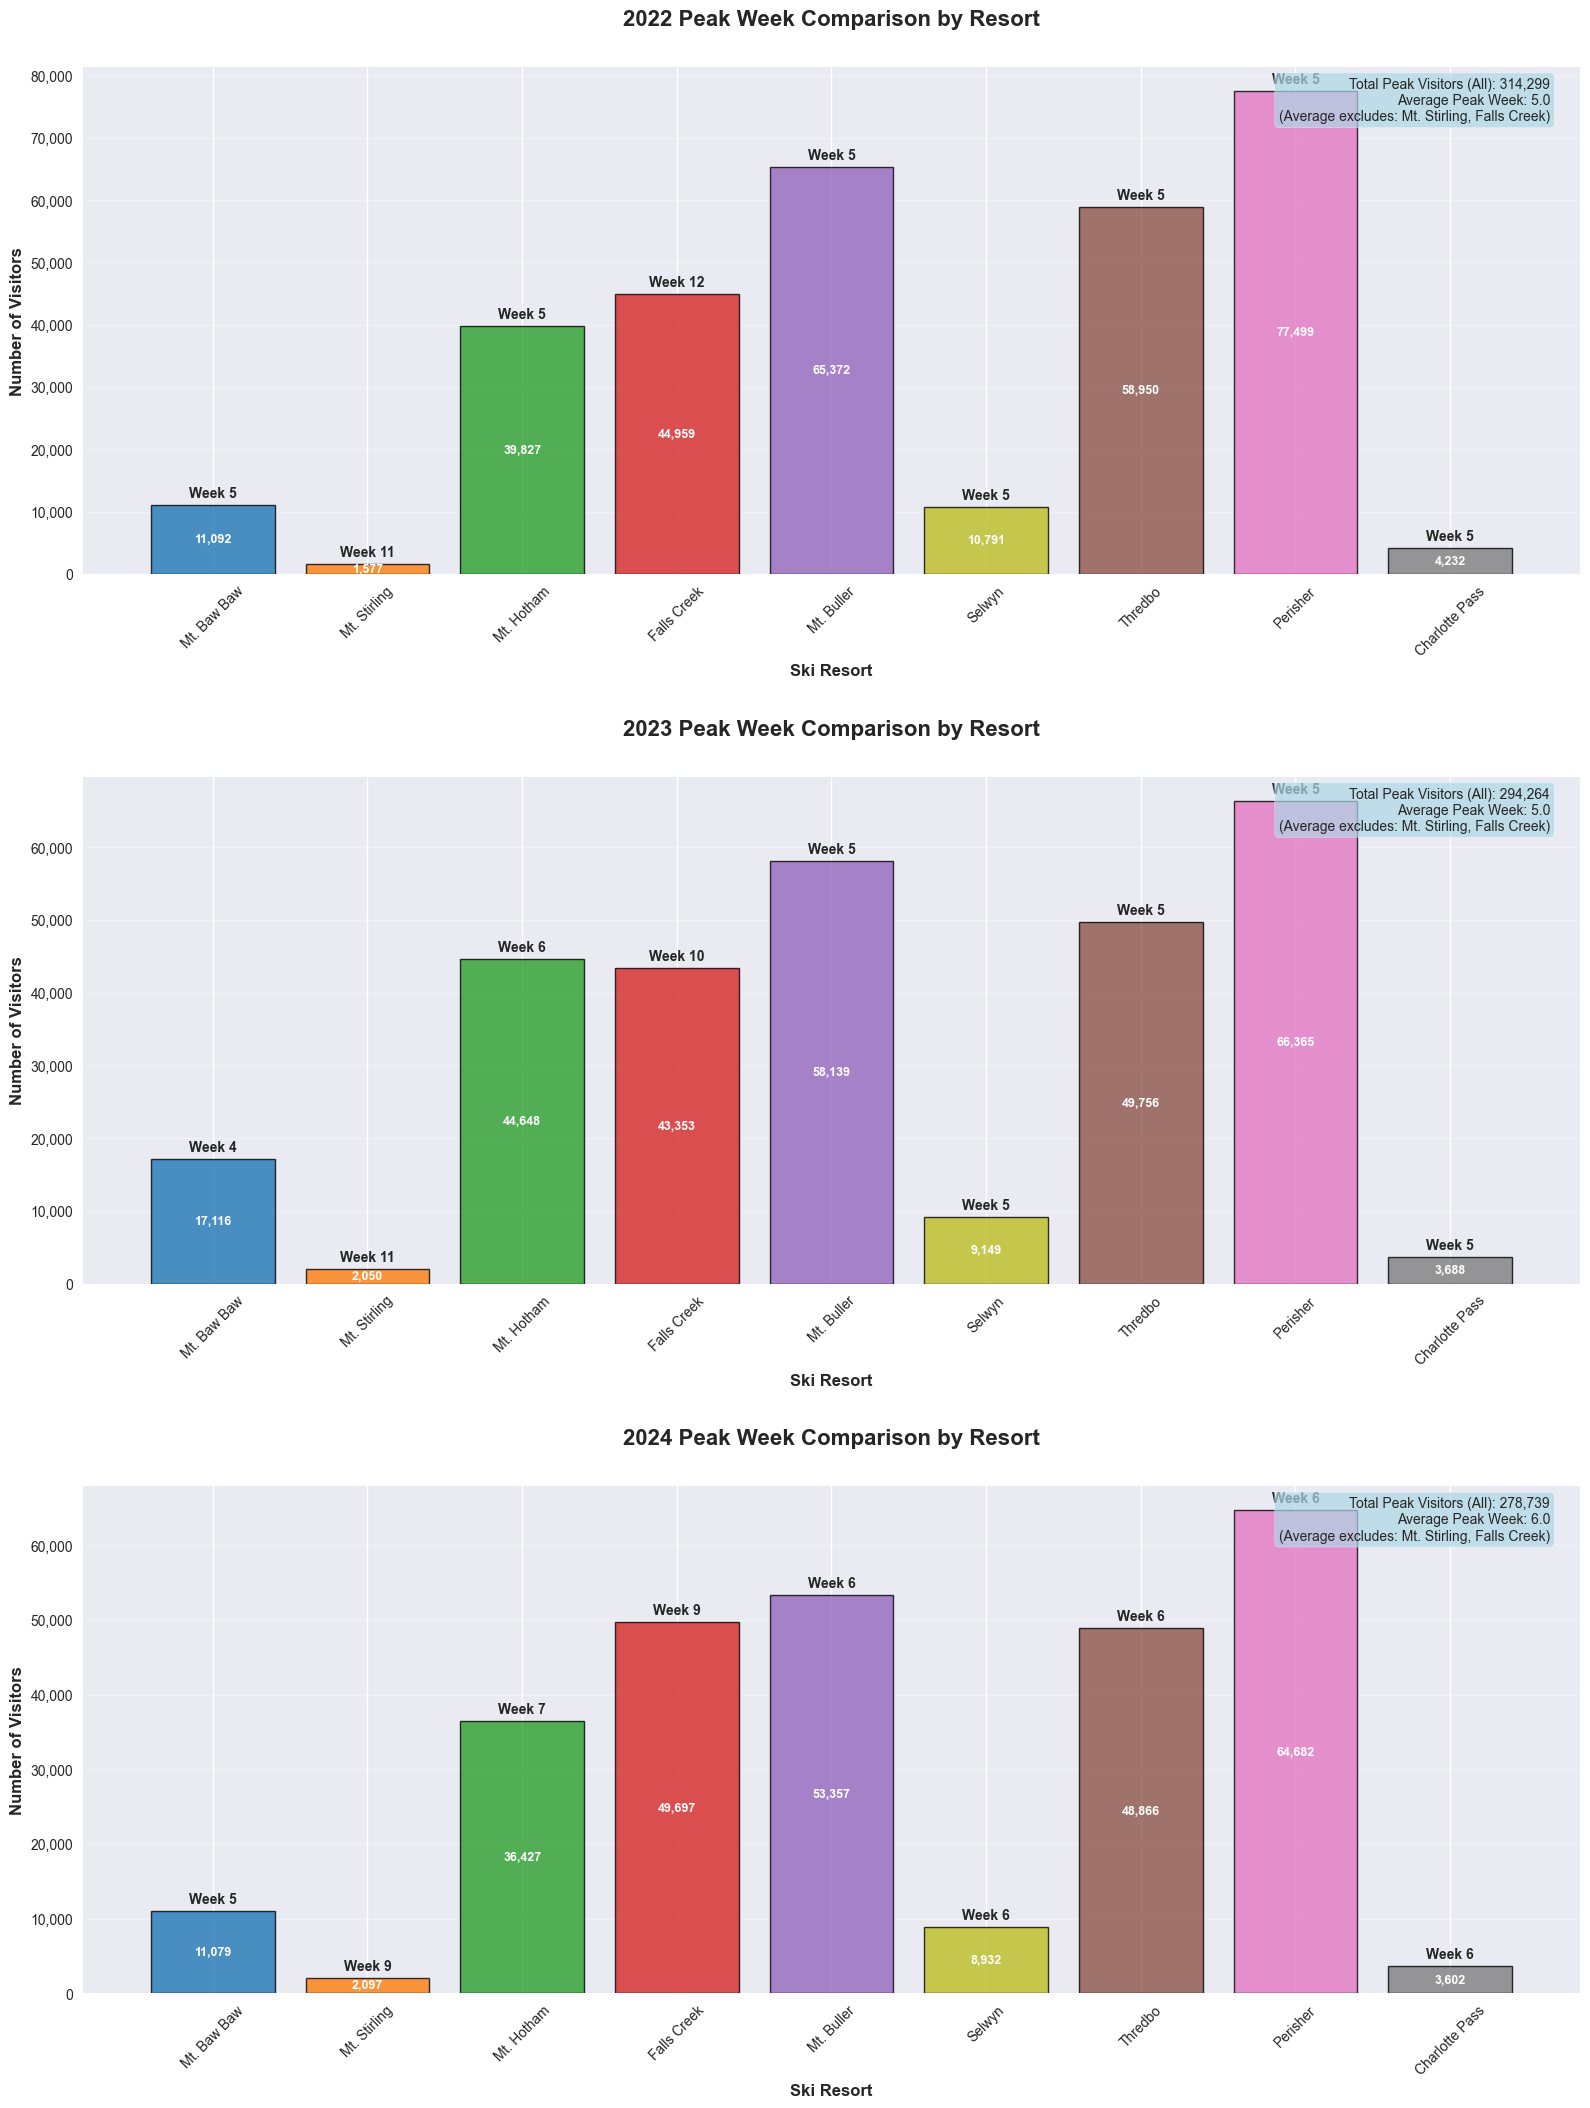


PEAK WEEK ANALYSIS SUMMARY:

2022 Peak Data:
--------------------
 1. Perisher        Week  5  77,499 visitors
 2. Mt. Buller      Week  5  65,372 visitors
 3. Thredbo         Week  5  58,950 visitors
 4. Falls Creek     Week 12  44,959 visitors (excluded from avg)
 5. Mt. Hotham      Week  5  39,827 visitors
 6. Mt. Baw Baw     Week  5  11,092 visitors
 7. Selwyn          Week  5  10,791 visitors
 8. Charlotte Pass  Week  5  4,232 visitors
 9. Mt. Stirling    Week 11  1,577 visitors (excluded from avg)

Annual Statistics:
  Total Peak Visitors (All Resorts): 314,299
  Average Peak Week (excluding Mt. Stirling, Falls Creek): 5.0
  Most Popular Resort: Perisher (77,499 visitors)

2023 Peak Data:
--------------------
 1. Perisher        Week  5  66,365 visitors
 2. Mt. Buller      Week  5  58,139 visitors
 3. Thredbo         Week  5  49,756 visitors
 4. Mt. Hotham      Week  6  44,648 visitors
 5. Falls Creek     Week 10  43,353 visitors (excluded from avg)
 6. Mt. Baw Baw     Week  4  

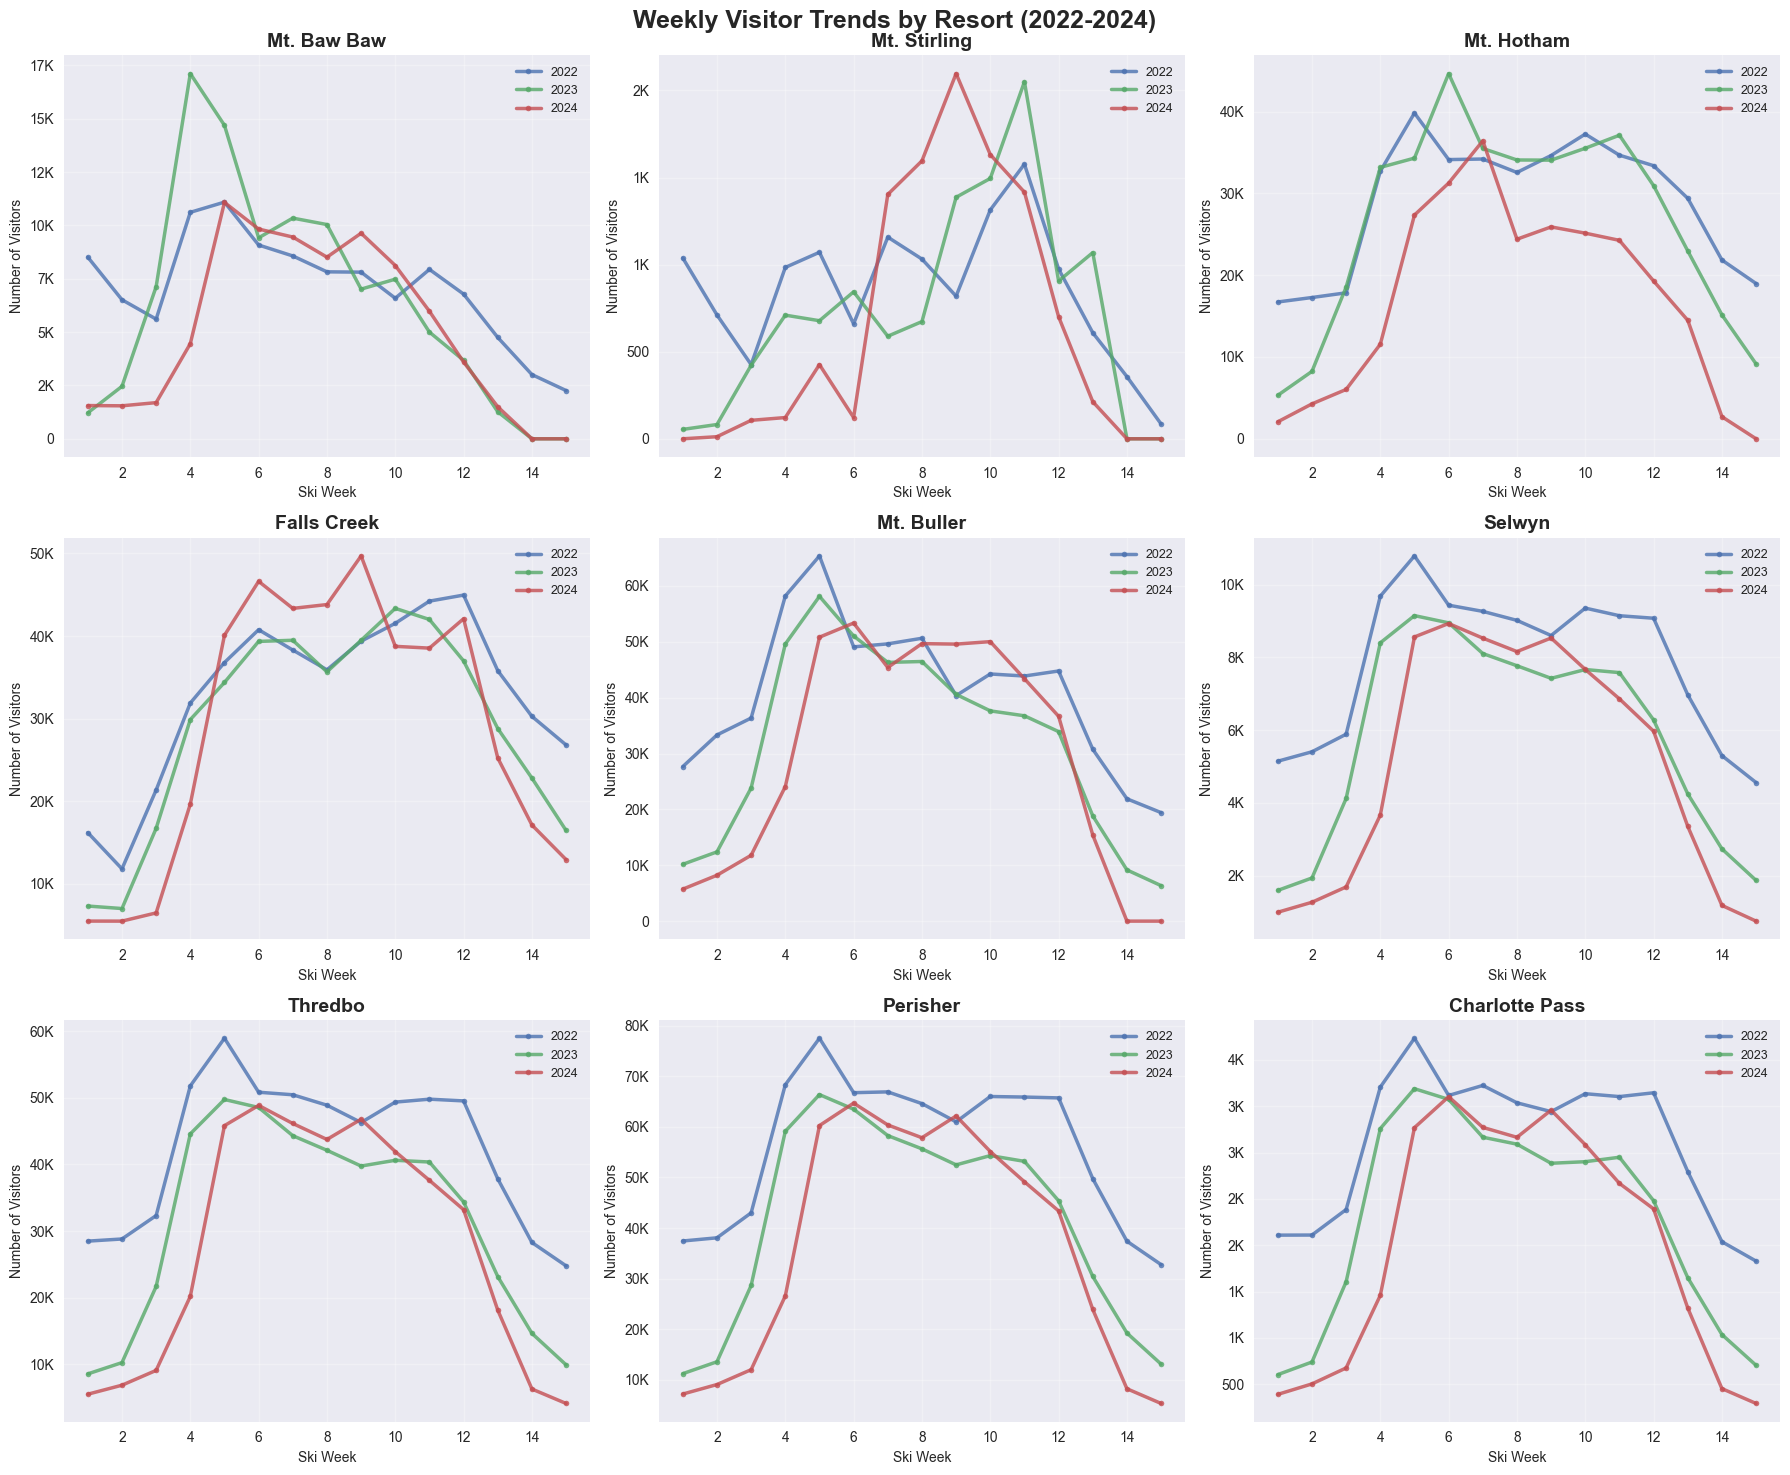


CREATING RESORT POPULARITY RANKING...
------------------------------


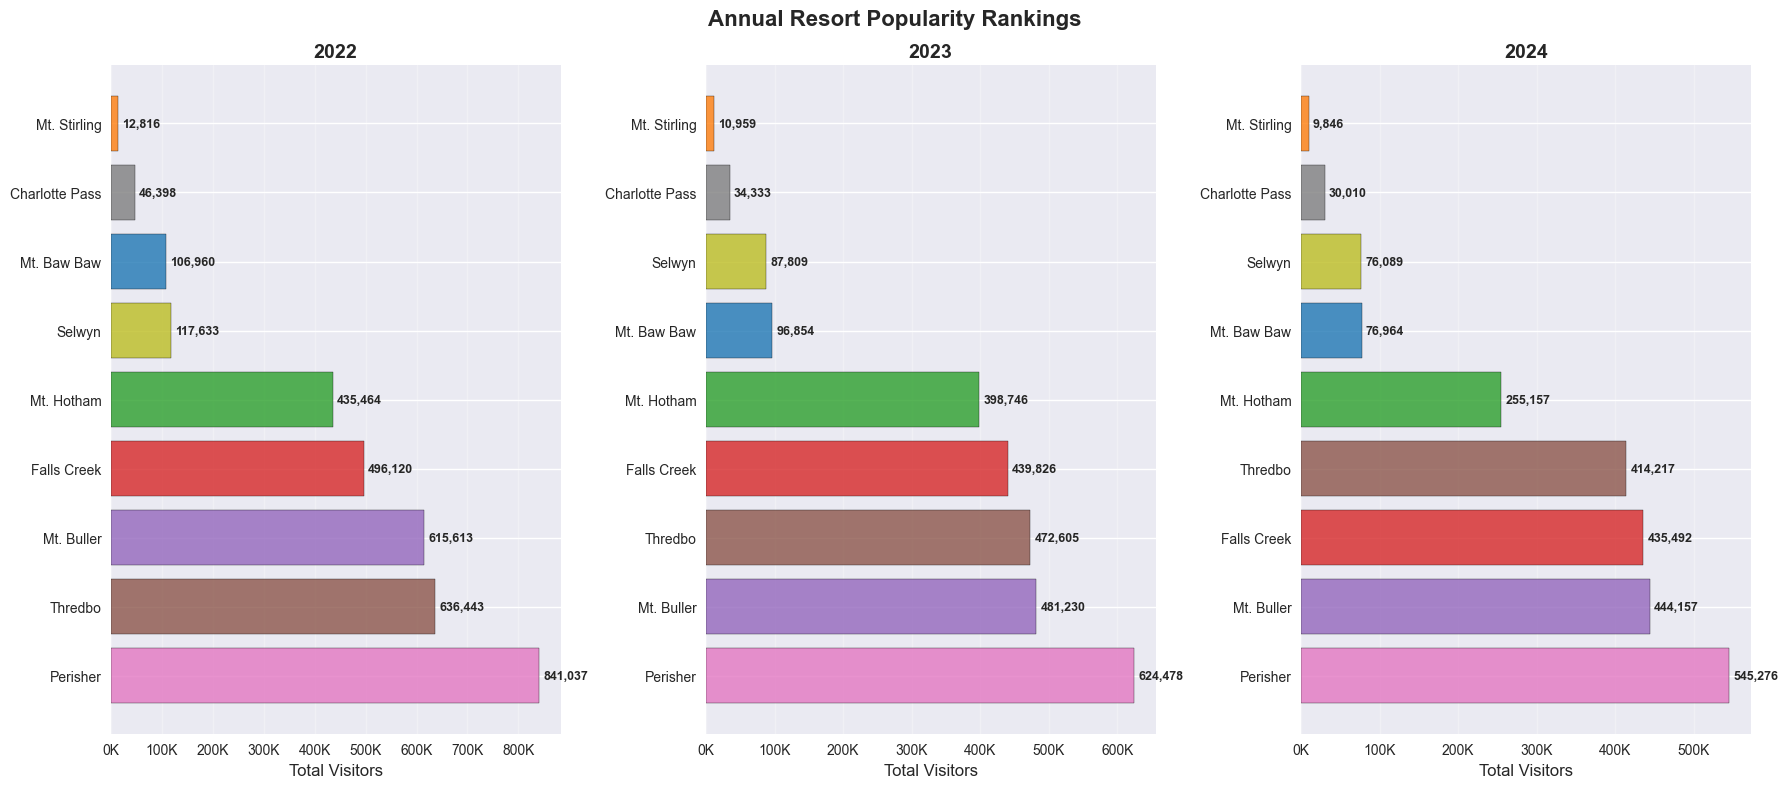


CREATING SEASONAL PATTERN ANALYSIS...
------------------------------


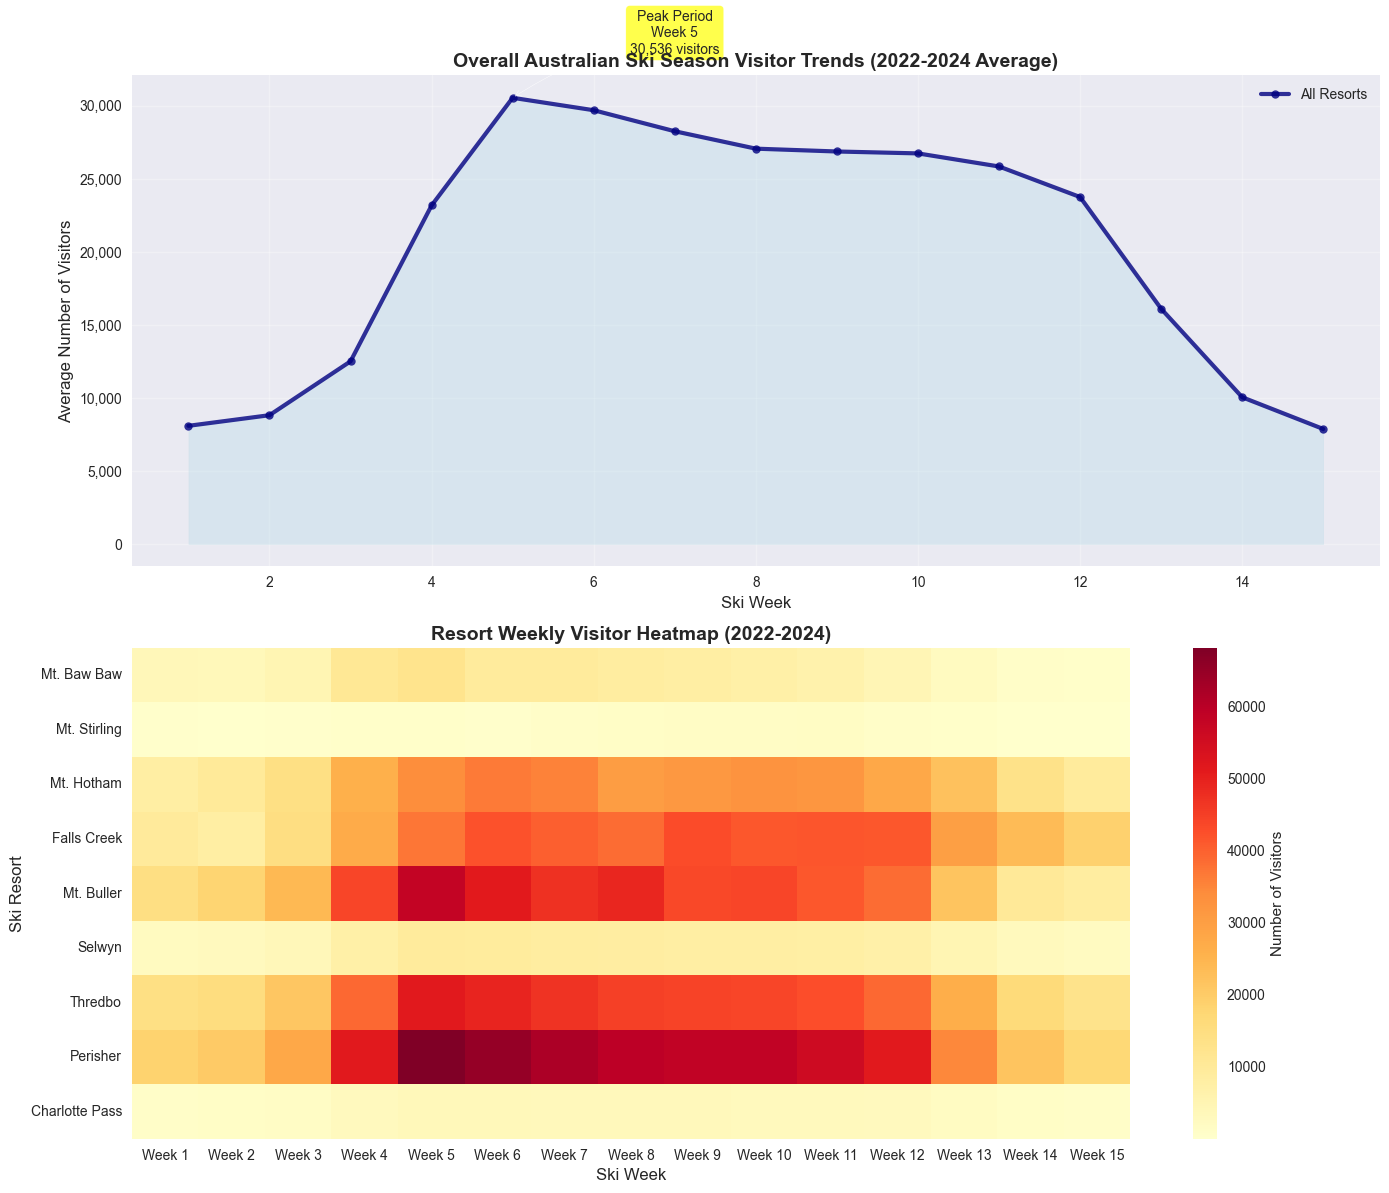


All visualizations displayed in notebook!
Note: Mt. Stirling and Falls Creek excluded ONLY from average peak week calculations

VISUALIZATION ANALYSIS COMPLETE!
Total records processed: 45
Years analyzed: 2022-2024
Resorts analyzed: 9
Resorts excluded from average calculations only: 2


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display inline in Jupyter
%matplotlib inline

# Set plot style and font configurations
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

class SkiResortVisualization:
    def __init__(self, excel_file_path):
        """
        Ski Resort Data Visualization Analyzer for Jupyter Notebook
        
        Args:
            excel_file_path (str): Path to Excel data file
        """
        self.excel_file = excel_file_path
        self.visitation_data = None
        
        # Resort color configuration
        self.resort_colors = {
            'Mt. Baw Baw': '#1f77b4',
            'Mt. Stirling': '#ff7f0e', 
            'Mt. Hotham': '#2ca02c',
            'Falls Creek': '#d62728',
            'Mt. Buller': '#9467bd',
            'Thredbo': '#8c564b',
            'Perisher': '#e377c2',
            'Charlotte Pass': '#7f7f7f',
            'Selwyn': '#bcbd22'
        }
        
        # Resorts to exclude ONLY from average peak week calculation
        self.excluded_from_average = ['Mt. Stirling', 'Falls Creek']
        
        self.load_data()
    
    def load_data(self):
        """Load visitation data from Excel file"""
        print("LOADING VISITATION DATA...")
        print("="*50)
        
        try:
            # Load visitation data
            self.visitation_data = pd.read_excel(self.excel_file, sheet_name="Visitation Data")
            print(f"Visitation data loaded: {len(self.visitation_data)} records")
            
            # Data preprocessing
            self._preprocess_data()
            
        except Exception as e:
            print(f"ERROR: Failed to load data: {e}")
            raise
    
    def _preprocess_data(self):
        """Data preprocessing for 2022-2024 analysis"""
        # Filter data for 2022-2024
        self.visitation_data = self.visitation_data[
            (self.visitation_data['Year'] >= 2022) & 
            (self.visitation_data['Year'] <= 2024)
        ]
        
        # Get all resort columns (excluding Year and Week)
        self.resort_columns = [col for col in self.visitation_data.columns 
                              if col not in ['Year', 'Week']]
        
        # Remove resorts with no data
        self.resort_columns = [col for col in self.resort_columns 
                              if self.visitation_data[col].sum() > 0]
        
        print(f"Data filtered for 2022-2024")
        print(f"Found {len(self.resort_columns)} resorts with data:")
        print(f"Resorts: {', '.join(self.resort_columns)}")
        print(f"Note: {', '.join(self.excluded_from_average)} excluded ONLY from average peak week calculations")
    
    def create_peak_week_analysis(self):
        """
        Create analysis of peak visitor weeks for each ski resort (2022-2024)
        Generate 3 separate charts for each year comparison
        """
        print("\nCREATING PEAK WEEK ANALYSIS...")
        print("-"*30)
        
        # Create subplots for each year with more space between titles
        fig, axes = plt.subplots(3, 1, figsize=(16, 22))
        
        # Fix title overlap by setting y position lower and adding proper spacing
        # fig.suptitle('Australian Ski Resort Peak Week Analysis (2022-2024)', 
        #              fontsize=20, fontweight='bold', y=0.96)
        
        peak_summary = {}
        
        for i, year in enumerate([2022, 2023, 2024]):
            ax = axes[i]
            
            # Get data for the specific year
            year_data = self.visitation_data[self.visitation_data['Year'] == year]
            
            if len(year_data) == 0:
                ax.text(0.5, 0.5, f'No data available for {year}', 
                       transform=ax.transAxes, ha='center', va='center', fontsize=14)
                ax.set_title(f'{year} - No Data Available', fontsize=16, fontweight='bold', pad=30)
                continue
            
            # Find peak week for each resort
            resort_peaks = {}
            
            for resort in self.resort_columns:
                if resort in year_data.columns:
                    resort_data = year_data[year_data[resort].notna()]
                    if len(resort_data) > 0:
                        # Find week with maximum visitors
                        max_visitors_idx = resort_data[resort].idxmax()
                        max_week = resort_data.loc[max_visitors_idx, 'Week']
                        max_visitors = resort_data.loc[max_visitors_idx, resort]
                        
                        resort_peaks[resort] = {
                            'week': max_week,
                            'visitors': max_visitors
                        }
            
            if not resort_peaks:
                ax.text(0.5, 0.5, f'No valid data for {year}', 
                       transform=ax.transAxes, ha='center', va='center', fontsize=14)
                ax.set_title(f'{year} - No Valid Data', fontsize=16, fontweight='bold', pad=30)
                continue
            
            # Create bar chart
            resorts = list(resort_peaks.keys())
            weeks = [resort_peaks[resort]['week'] for resort in resorts]
            visitors = [resort_peaks[resort]['visitors'] for resort in resorts]
            colors = [self.resort_colors.get(resort, '#1f77b4') for resort in resorts]
            
            # Main bar chart - visitor numbers
            bars = ax.bar(resorts, visitors, color=colors, alpha=0.8, 
                         edgecolor='black', linewidth=1)
            
            # Add week labels on top of bars
            for j, (resort, bar) in enumerate(zip(resorts, bars)):
                height = bar.get_height()
                week = weeks[j]
                ax.text(bar.get_x() + bar.get_width()/2., height + max(visitors)*0.01,
                       f'Week {week}', ha='center', va='bottom', 
                       fontweight='bold', fontsize=10)
                
                # Add visitor count inside bars
                ax.text(bar.get_x() + bar.get_width()/2., height/2,
                       f'{int(height):,}', ha='center', va='center', 
                       fontweight='bold', fontsize=9, color='white')
            
            # Chart formatting with more padding to avoid title overlap
            ax.set_title(f'{year} Peak Week Comparison by Resort', 
                        fontsize=16, fontweight='bold', pad=30)
            ax.set_ylabel('Number of Visitors', fontsize=12, fontweight='bold')
            ax.set_xlabel('Ski Resort', fontsize=12, fontweight='bold')
            
            # Rotate x-axis labels to avoid overlap
            ax.tick_params(axis='x', rotation=45, labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            
            # Add grid
            ax.grid(axis='y', alpha=0.3)
            ax.set_axisbelow(True)
            
            # Format y-axis values
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
            
            # Save yearly peak data
            peak_summary[year] = resort_peaks
            
            # Calculate statistics excluding specified resorts ONLY for average calculation
            filtered_weeks = [week for resort, week in zip(resorts, weeks) 
                             if resort not in self.excluded_from_average]
            filtered_visitors = [visitor for resort, visitor in zip(resorts, visitors) 
                               if resort not in self.excluded_from_average]
            
            total_peak_visitors = sum(visitors)  # Total for all resorts
            total_filtered_visitors = sum(filtered_visitors)  # Total excluding specified
            avg_peak_week = np.mean(filtered_weeks) if filtered_weeks else 0
            
            stats_text = (f'Total Peak Visitors (All): {total_peak_visitors:,}\n'
                         f'Average Peak Week: {avg_peak_week:.1f}\n'
                         f'(Average excludes: {", ".join(self.excluded_from_average)})')
            
            ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
                   verticalalignment='top', horizontalalignment='right', fontsize=10)
        
        # Adjust layout with more spacing between subplots
        plt.tight_layout()
        plt.subplots_adjust(top=0.93, hspace=0.4)  # Increased hspace and lowered top
        plt.show()
        
        # Print detailed analysis
        self._print_peak_analysis(peak_summary)
        
        return peak_summary
    
    def _print_peak_analysis(self, peak_summary):
        """Print detailed peak week analysis"""
        print("\nPEAK WEEK ANALYSIS SUMMARY:")
        print("="*50)
        
        for year, data in peak_summary.items():
            if not data:
                print(f"\n{year}: No data available")
                continue
                
            print(f"\n{year} Peak Data:")
            print("-"*20)
            
            # Sort by visitor count
            sorted_resorts = sorted(data.items(), key=lambda x: x[1]['visitors'], reverse=True)
            
            for i, (resort, info) in enumerate(sorted_resorts, 1):
                # Only mark as excluded in summary, but still show data
                excluded_note = " (excluded from avg)" if resort in self.excluded_from_average else ""
                print(f"{i:2d}. {resort:<15} Week {info['week']:2d}  {info['visitors']:,} visitors{excluded_note}")
            
            # Annual statistics (excluding specified resorts from average only)
            filtered_data = {k: v for k, v in data.items() if k not in self.excluded_from_average}
            
            if filtered_data:
                total_visitors = sum(info['visitors'] for info in data.values())  # All resorts
                total_filtered_visitors = sum(info['visitors'] for info in filtered_data.values())  # Filtered
                avg_week = np.mean([info['week'] for info in filtered_data.values()])
                top_resort = max(data.items(), key=lambda x: x[1]['visitors'])  # Top from all resorts
                
                print(f"\nAnnual Statistics:")
                print(f"  Total Peak Visitors (All Resorts): {total_visitors:,}")
                print(f"  Average Peak Week (excluding {', '.join(self.excluded_from_average)}): {avg_week:.1f}")
                print(f"  Most Popular Resort: {top_resort[0]} ({top_resort[1]['visitors']:,} visitors)")
    
    def create_weekly_trend_comparison(self):
        """
        Create weekly trend comparison for each ski resort (2022-2024)
        """
        print("\nCREATING WEEKLY TREND COMPARISON...")
        print("-"*30)
        
        # Calculate number of subplots needed
        n_resorts = len(self.resort_columns)
        n_cols = 3
        n_rows = (n_resorts + n_cols - 1) // n_cols
        
        # Create subplots
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
        fig.suptitle('Weekly Visitor Trends by Resort (2022-2024)', 
                     fontsize=18, fontweight='bold')
        
        # Handle different subplot arrangements
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i, resort in enumerate(self.resort_columns):
            if i >= len(axes):
                break
                
            ax = axes[i]
            
            # Plot trend line for each year
            for year in [2022, 2023, 2024]:
                year_data = self.visitation_data[
                    (self.visitation_data['Year'] == year) & 
                    (self.visitation_data[resort].notna())
                ]
                
                if len(year_data) > 0:
                    weeks = year_data['Week']
                    visitors = year_data[resort]
                    
                    ax.plot(weeks, visitors, marker='o', linewidth=2.5, markersize=4,
                           label=f'{year}', alpha=0.8)
            
            # Chart formatting - NO exclusion marking here
            ax.set_title(f'{resort}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Ski Week', fontsize=10)
            ax.set_ylabel('Number of Visitors', fontsize=10)
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Format y-axis
            ax.yaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x >= 1000 else f'{int(x)}')
            )
        
        # Hide unused subplots
        for i in range(len(self.resort_columns), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def create_resort_popularity_ranking(self):
        """
        Create resort popularity ranking based on total visitor numbers
        """
        print("\nCREATING RESORT POPULARITY RANKING...")
        print("-"*30)
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 8))
        fig.suptitle('Annual Resort Popularity Rankings', fontsize=16, fontweight='bold')
        
        for i, year in enumerate([2022, 2023, 2024]):
            ax = axes[i]
            
            year_data = self.visitation_data[self.visitation_data['Year'] == year]
            
            if len(year_data) == 0:
                ax.text(0.5, 0.5, f'No data\navailable\nfor {year}', 
                       transform=ax.transAxes, ha='center', va='center', fontsize=12)
                ax.set_title(f'{year}', fontsize=14, fontweight='bold')
                continue
            
            # Calculate total visitors per resort
            resort_totals = {}
            for resort in self.resort_columns:
                if resort in year_data.columns:
                    total = year_data[resort].sum()
                    if not pd.isna(total) and total > 0:
                        resort_totals[resort] = total
            
            if not resort_totals:
                ax.text(0.5, 0.5, f'No valid data\nfor {year}', 
                       transform=ax.transAxes, ha='center', va='center', fontsize=12)
                ax.set_title(f'{year}', fontsize=14, fontweight='bold')
                continue
            
            # Sort resorts by total visitors
            sorted_resorts = sorted(resort_totals.items(), key=lambda x: x[1], reverse=True)
            
            resorts = [item[0] for item in sorted_resorts]
            totals = [item[1] for item in sorted_resorts]
            colors = [self.resort_colors.get(resort, '#1f77b4') for resort in resorts]
            
            # Create horizontal bar chart
            bars = ax.barh(resorts, totals, color=colors, alpha=0.8, edgecolor='black')
            
            # Add value labels - NO exclusion marking here
            for j, (resort, bar) in enumerate(zip(resorts, bars)):
                width = bar.get_width()
                ax.text(width + max(totals)*0.01, bar.get_y() + bar.get_height()/2,
                       f'{int(width):,}', ha='left', va='center', 
                       fontweight='bold', fontsize=9)
            
            ax.set_title(f'{year}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Total Visitors', fontsize=12)
            ax.grid(axis='x', alpha=0.3)
            
            # Format x-axis
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
        
        plt.tight_layout()
        plt.show()
    
    def create_seasonal_pattern_analysis(self):
        """
        Create seasonal pattern analysis across all years and resorts
        MODIFIED: Show only "All Resorts" line in the seasonal trend
        """
        print("\nCREATING SEASONAL PATTERN ANALYSIS...")
        print("-"*30)
        
        # Calculate average visitors per week across all years and resorts (ALL RESORTS ONLY)
        weekly_averages_all = {}
        all_weeks = sorted(self.visitation_data['Week'].unique())
        
        for week in all_weeks:
            week_data = self.visitation_data[self.visitation_data['Week'] == week]
            weekly_totals_all = []
            
            for resort in self.resort_columns:
                if resort in week_data.columns:
                    resort_week_data = week_data[week_data[resort].notna()]
                    if len(resort_week_data) > 0:
                        # Add all resort data
                        weekly_totals_all.extend(resort_week_data[resort].tolist())
            
            if weekly_totals_all:
                weekly_averages_all[week] = np.mean(weekly_totals_all)
        
        # Create seasonal trend plots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
        
        # Top plot: Overall seasonal trend (ONLY ALL RESORTS LINE)
        if weekly_averages_all:
            weeks_all = list(weekly_averages_all.keys())
            averages_all = list(weekly_averages_all.values())
            
            # Plot only the "All Resorts" line
            ax1.plot(weeks_all, averages_all, marker='o', linewidth=3, markersize=6, 
                    color='navy', alpha=0.8, label='All Resorts')
            ax1.fill_between(weeks_all, averages_all, alpha=0.3, color='lightblue')
            
            # Annotate peak week
            if averages_all:
                peak_week = weeks_all[averages_all.index(max(averages_all))]
                peak_visitors = max(averages_all)
                ax1.annotate(f'Peak Period\nWeek {peak_week}\n{int(peak_visitors):,} visitors', 
                            xy=(peak_week, peak_visitors), xytext=(peak_week+2, peak_visitors*1.1),
                            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1'),
                            fontsize=10, ha='center', 
                            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
            
            ax1.set_title('Overall Australian Ski Season Visitor Trends (2022-2024 Average)', 
                         fontsize=14, fontweight='bold')
            ax1.set_xlabel('Ski Week', fontsize=12)
            ax1.set_ylabel('Average Number of Visitors', fontsize=12)
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # Format y-axis
            ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
        
        # Bottom plot: Resort heatmap - NO exclusion marking
        heatmap_data = []
        resort_names = []
        
        for resort in self.resort_columns:
            resort_weekly = []
            has_data = False
            
            for week in all_weeks:
                week_data = self.visitation_data[
                    (self.visitation_data['Week'] == week) & 
                    (self.visitation_data[resort].notna())
                ]
                if len(week_data) > 0:
                    avg_visitors = week_data[resort].mean()
                    resort_weekly.append(avg_visitors)
                    if avg_visitors > 0:
                        has_data = True
                else:
                    resort_weekly.append(0)
            
            if has_data:  # Only include resorts with actual data
                heatmap_data.append(resort_weekly)
                resort_names.append(resort)  # No exclusion marking in heatmap
        
        if heatmap_data:
            heatmap_df = pd.DataFrame(heatmap_data, 
                                     index=resort_names, 
                                     columns=[f'Week {i}' for i in all_weeks])
            
            sns.heatmap(heatmap_df, annot=False, cmap='YlOrRd', ax=ax2, 
                       cbar_kws={'label': 'Number of Visitors'})
            ax2.set_title('Resort Weekly Visitor Heatmap (2022-2024)', 
                         fontsize=14, fontweight='bold')
            ax2.set_xlabel('Ski Week', fontsize=12)
            ax2.set_ylabel('Ski Resort', fontsize=12)
        
        plt.tight_layout()
        plt.show()
    
    def generate_comprehensive_report(self):
        """
        Generate comprehensive visualization analysis report for Jupyter Notebook
        """
        print("\nGENERATING COMPREHENSIVE VISUALIZATION REPORT...")
        print("="*50)
        print(f"Note: {', '.join(self.excluded_from_average)} excluded ONLY from average peak week calculations")
        print("="*50)
        
        # 1. Peak week analysis
        peak_summary = self.create_peak_week_analysis()
        
        # 2. Weekly trend comparison
        self.create_weekly_trend_comparison()
        
        # 3. Resort popularity ranking
        self.create_resort_popularity_ranking()
        
        # 4. Seasonal pattern analysis (modified to show only "All Resorts")
        self.create_seasonal_pattern_analysis()
        
        print("\nAll visualizations displayed in notebook!")
        print("Note: Mt. Stirling and Falls Creek excluded ONLY from average peak week calculations")
        
        return peak_summary

# Initialize and run analysis
excel_file = "2025 Allianz Datathon Dataset.xlsx"

try:
    visualizer = SkiResortVisualization(excel_file)
    peak_summary = visualizer.generate_comprehensive_report()
    
    print(f"\nVISUALIZATION ANALYSIS COMPLETE!")
    print(f"Total records processed: {len(visualizer.visitation_data)}")
    print(f"Years analyzed: 2022-2024")
    print(f"Resorts analyzed: {len(visualizer.resort_columns)}")
    print(f"Resorts excluded from average calculations only: {len(visualizer.excluded_from_average)}")
    
except Exception as e:
    print(f"ERROR: {e}")
    print("Please ensure the Excel file exists and has the correct sheet names.")

## 5. Next Steps Preview

The following analysis sections will be implemented:

### Phase 2: Core Analysis
- Weather-Visitation Correlation Analysis
- Peak vs Off-Peak Week Identification  
- Resort Performance Comparison
- Historical Trend Analysis (2014-2024)

### Phase 3: External Data Integration
- Flight price research and integration
- Accommodation cost analysis
- Resort pricing and amenities
- Special events and school holidays

### Phase 4: 2026 Predictions
- Weather forecasting for 2026 ski season
- Visitor demand predictions
- Price trend projections

### Phase 5: Recommendation Engine
- Multi-criteria decision analysis
- Optimal week and resort selection
- Trade-off analysis and sensitivity testing

In [10]:
# Save cleaned data for next phase
print("Data preparation completed!")
print("\nDatasets ready for analysis:")
print(f"- Visitation data: {visitation_data.shape[0]} records across {len(resort_columns)} resorts")
print(f"- Climate data: {climate_data.shape[0]} records from {climate_data['Resort'].nunique()} weather stations")
print(f"- Time period: {visitation_data['Year'].min()}-{visitation_data['Year'].max()} (visitation)")
print(f"- Climate period: {climate_data['Year'].min()}-{climate_data['Year'].max()} (weather)")

Data preparation completed!

Datasets ready for analysis:
- Visitation data: 165 records across 9 resorts
- Climate data: 39813 records from 7 weather stations
- Time period: 2014-2024 (visitation)
- Climate period: 2010-2025 (weather)
